## 124. Binary Tree Maximum Path Sum
<div class="elfjS" data-track-load="description_content"><p>A <strong>path</strong> in a binary tree is a sequence of nodes where each pair of adjacent nodes in the sequence has an edge connecting them. A node can only appear in the sequence <strong>at most once</strong>. Note that the path does not need to pass through the root.</p>

<p>The <strong>path sum</strong> of a path is the sum of the node's values in the path.</p>

<p>Given the <code>root</code> of a binary tree, return <em>the maximum <strong>path sum</strong> of any <strong>non-empty</strong> path</em>.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2020/10/13/exx1.jpg" style="width: 322px; height: 182px;">
<pre><strong>Input:</strong> root = [1,2,3]
<strong>Output:</strong> 6
<strong>Explanation:</strong> The optimal path is 2 -&gt; 1 -&gt; 3 with a path sum of 2 + 1 + 3 = 6.
</pre>

<p><strong class="example">Example 2:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2020/10/13/exx2.jpg">
<pre><strong>Input:</strong> root = [-10,9,20,null,null,15,7]
<strong>Output:</strong> 42
<strong>Explanation:</strong> The optimal path is 15 -&gt; 20 -&gt; 7 with a path sum of 15 + 20 + 7 = 42.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li>The number of nodes in the tree is in the range <code>[1, 3 * 10<sup>4</sup>]</code>.</li>
	<li><code>-1000 &lt;= Node.val &lt;= 1000</code></li>
</ul>
</div>

In [1]:
from typing import List, Optional
%load_ext memory_magics

## Solution 1

In [2]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    def maxPathSum(self, root: Optional[TreeNode]) -> int:
        def helper(node: TreeNode, memo: dict) -> int:
            if not node:
                return 0
            if node in memo:
                return memo[node]

            # Recursively get the maximum path sum of the left and right subtrees.
            left_max = max(helper(node.left, memo), 0)  # If negative, consider as 0
            right_max = max(helper(node.right, memo), 0)  # If negative, consider as 0

            # Calculate the path sum through the current node
            current_path_sum = node.val + left_max + right_max

            # Update the global maximum sum
            nonlocal max_sum
            max_sum = max(max_sum, current_path_sum)

            # Memoize the result for the current node
            memo[node] = node.val + max(left_max, right_max)

            # Return the maximum path sum including the current node and one of its subtrees
            return memo[node]

        max_sum = float('-inf')
        memo = {}
        helper(root, memo)
        return max_sum


In [3]:
from graphviz import Digraph
from collections import deque 

def build_tree(values):
    if not values:
        return None
    iter_values = iter(values)
    root = TreeNode(next(iter_values))
    queue = deque([root])
    while queue:
        node = queue.popleft()
        try:
            left_val = next(iter_values)
            if left_val is not None:
                node.left = TreeNode(left_val)
                queue.append(node.left)
            right_val = next(iter_values)
            if right_val is not None:
                node.right = TreeNode(right_val)
                queue.append(node.right)
        except StopIteration:
            break
    return root

def plot_tree(node, graph=None, node_id=0):
    if graph is None:
        graph = Digraph()
        graph.attr(size='8,8')
    if node is not None:
        graph.node(str(node_id), str(node.val))
        if node.left:
            graph.edge(str(node_id), str(2 * node_id + 1))
            plot_tree(node.left, graph, 2 * node_id + 1)
        if node.right:
            graph.edge(str(node_id), str(2 * node_id + 2))
            plot_tree(node.right, graph, 2 * node_id + 2)
    return graph

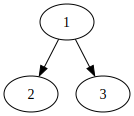

In [4]:
tree1 = build_tree(iter([1, 2, 3]))
plot_tree(tree1)

In [5]:
%%time
solution = Solution()
solution.maxPathSum(tree1)

CPU times: user 30 µs, sys: 7 µs, total: 37 µs
Wall time: 40.3 µs


6

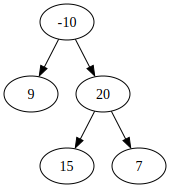

In [6]:
tree2 = build_tree(iter([-10, 9, 20, None, None, 15, 7]))
plot_tree(tree2)

In [7]:
%%time
solution = Solution()
solution.maxPathSum(tree2)

CPU times: user 44 µs, sys: 4 µs, total: 48 µs
Wall time: 65.8 µs


42